In [162]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import wavfile
from scipy.signal import decimate
from comp28512_utils import Audio
from numpy import fft
from scipy.fftpack import dct
from scipy.fftpack import dct, idct
from tempfile import TemporaryFile as tf

def plotme(x,y,labelX,labelY,graphName):
    plt.plot(x,y)
    plt.title(graphName)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    plt.show()
    
    
def sin(Fs, f, harmonics):
    T = 1.0/Fs
    x = np.arange(500)
    y = np.zeros(500)
    for k in range(1, harmonics):
        if (k%2) == 1:
            y += (1.0 / k) * np.sin(2 * np.pi *  f * k * T * x)
    return y
def cos(Fs, f,harmonics):
    T = 1.0/Fs
    x = np.arange(500)
    y = np.zeros(500)
    for k in range(1, harmonics):
        if (k%2) == 1:
            y += (1.0 / k*k) * np.cos(2 * np.pi *  f * k * T * x)
    return y

def sinPhase(Fs, f,harmonics):
    T = 1.0/Fs
    x = np.arange(500)
    y = np.zeros(500)
    for k in range(1, harmonics):
        if (k%2) == 1:
            if k == 3:
                y += (1.0 / k) * np.sin(2 * np.pi *  f * k * T * x + np.pi / 2)
            else:
                y += (1.0 / k) * np.sin(2 * np.pi *  f * k * T * x)
    return y

def makeFourier(audio, Fs):

    length = len(noise[1:501])
    x = np.arange(1,length+1)
    scaledT = length / float(Fs)
    fourierFrequency = x / scaledT
    Fourier = fft.fft(noise[1:501])
    
    return length, fourierFrequency, Fourier

# Task 2.1

##### Part a

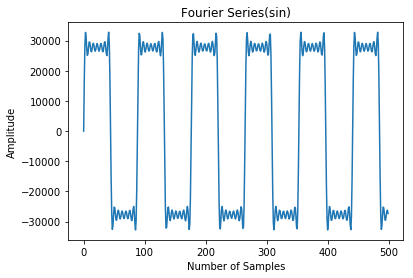

In [2]:
y = np.zeros(500)
x = np.arange(500)
y = sin(44100, 500, 15)
A = np.amax(np.absolute(y))
quant = np.round((y * (2**16 - 1) / 2) / A - 0.5)
intQ = np.int16(quant)
plotme(x,intQ,'Number of Samples','Amplitude','Fourier Series(sin)')

##### Part b

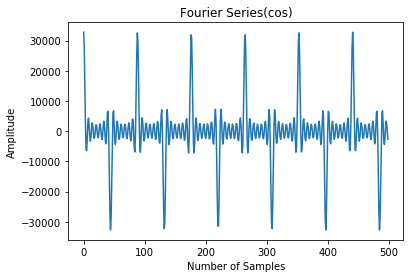

In [3]:
y = np.zeros(500)
x = np.arange(500)
y = cos(44100, 500, 15)
A = np.amax(np.absolute(y))
quant = np.round((y * (2**16 - 1) / 2) / A - 0.5)
intQ = np.int16(quant)
plotme(x,intQ,'Number of Samples','Amplitude','Fourier Series(cos)')

##### Part c

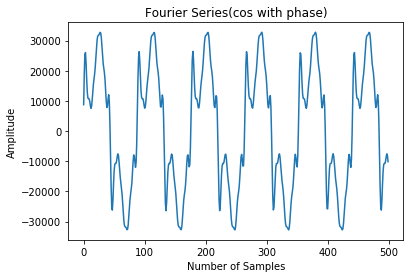

In [4]:
y = np.zeros(500)
x = np.arange(500)
y = sinPhase(44100, 500, 15)
A = np.amax(np.absolute(y))
quant = np.round((y * (2**16 - 1) / 2) / A - 0.5)
intQ = np.int16(quant)
plotme(x,intQ,'Number of Samples','Amplitude','Fourier Series(cos with phase)')

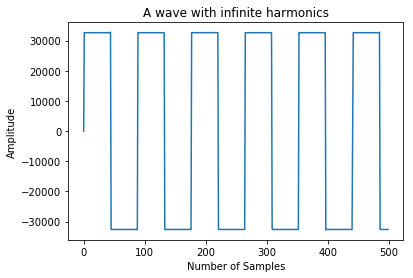

In [5]:
y = np.zeros(500)
x = np.arange(500)
y = sin(44100, 500, 10000)
A = np.amax(np.absolute(y))
quant = np.round((y * (2**16 - 1) / 2) / A - 0.5)
intQ = np.int16(quant)
plotme(x,intQ,'Number of Samples','Amplitude','A wave with infinite harmonics')

The first and the third waves are similar in the way that, when the harmonic is equal to three the amplitude is the same for both waveforms

# Task 2.2

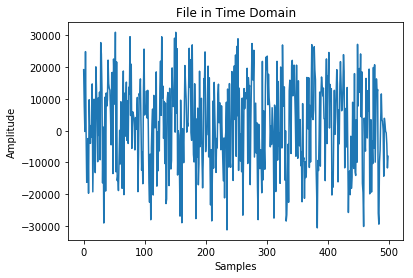

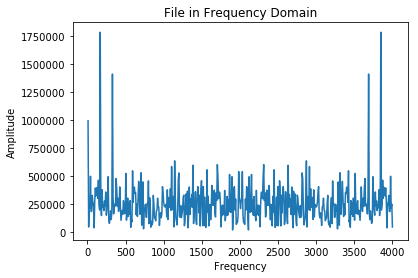

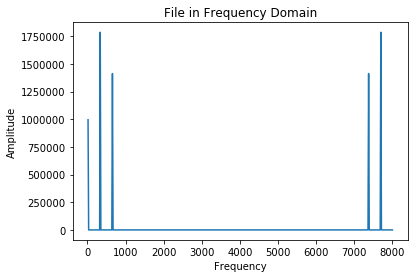

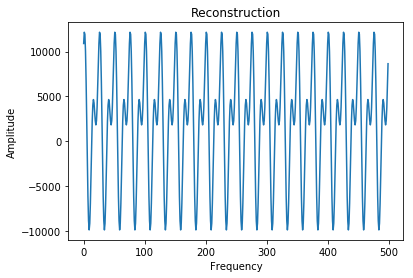

In [6]:
(Fs, noise) = wavfile.read("noisySinewave.wav")

x = np.arange(500)
plotme(x, noise[1:501],'Samples','Amplitude','File in Time Domain')

length,rate,Fourier = makeFourier(noise, Fs)

plotme(rate/2, np.abs(Fourier),'Frequency','Amplitude','File in Frequency Domain')

ModFourier = np.absolute(Fourier);

for i in range(0,500):
    if(ModFourier[i] <= 750000):
        Fourier[i] = 0
    
ModFourier = np.absolute(Fourier);
        
plotme(rate, ModFourier,'Frequency','Amplitude','File in Frequency Domain')

#y = makeInverseFourier(Fourier, length)
y = fft.ifft(Fourier)
y = np.real(y)
#x = np.arange(1,)
plotme(x, y,'Frequency','Amplitude','Reconstruction')

# Task 2.3

First we plot a sine wave in both time and frequency domains

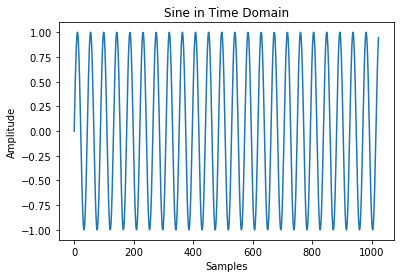

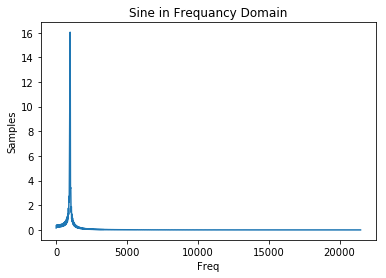

In [8]:
def scale16(input):
    input = input / np.amax(np.absolute(input))
    
    return np.round((input*(2**16 - 1)/2) -0.5)
x = np.arange(1024)

Fs = 44100
f = 1000
T = 1.0/Fs
y =  np.sin(2 * np.pi * f * x * T)
plotme(x,y,'Samples','Amplitude','Sine in Time Domain')


#sine wave dct
y = dct(y, norm='ortho')
plotme(x*(Fs/(2*1024)),np.absolute(y),'Freq','Samples','Sine in Frequancy Domain')

We continue by analysing a vivaldi sound file

In [9]:
#.wav dct
Fs,wave = wavfile.read("SVivaldi44.1mono.wav")
numberOfSegm = 500
numberOfSamples = 1024
x = np.arange(numberOfSegm * numberOfSamples)


#apply dct on segments
result = []
for segment in range(0,numberOfSegm):
    seg = wave[numberOfSamples*segment : numberOfSamples*(segment + 1)]
    temp = dct(seg, norm='ortho')
    for sample in temp :
        result.append(sample)
        

result = result / np.amax(np.abs(result))
result = np.round((result*(2**16 - 1)/2) -0.5)
result = np.int16(result)

#file output
outfile = tf()
np.save(outfile,result)
outfile.seek(0)
vivaldiFile = np.load(outfile)

#idct and output
resultVivaldi = []
for segment in range(0,numberOfSegm):
    seg = vivaldiFile[numberOfSamples*segment : numberOfSamples*(segment + 1)]
    temp = idct(seg, norm='ortho')
    for sample in temp :
        resultVivaldi.append(sample)
resultVivaldi = resultVivaldi / np.amax(np.abs(resultVivaldi))
resultVivaldi = np.round((resultVivaldi*(2**16 - 1)/2) -0.5)
resultVivaldi = np.int16(resultVivaldi)
Audio(resultVivaldi, rate = Fs)

Data written to /tmp/comp28512_LU7swL.wav.


<source src="data:audio/wav;base64,UklGRiSgDwBXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YQCgDwDM/Rz+0P0T/gL+z/3v
/WT+Vf48/iL+Uv4L/vv9Vv4v/m/+qP6x/sX+pP6N/kH+7/3b/ZH9oP2v/a/99v3P/e39KP4k/kH+
ef6N/lH+Df7g/XP9av2Z/e/9M/5p/kD+tf2Q/bT95/1R/qj+kP5G/sL9T/1h/eH9LP40/ij+6P3J
/WD9H/0o/Tv9gf3E/fr99f0H/pL9ufy4/OD8Of25/RD+KP4N/vb9z/32/Wn+2v7a/hz/Kf8Z/+z+
v/61/uv+GP///sL+dP43/hD+0/31/XT+pf7D/pr+Q/4D/sX9hv2N/dL9Qv5X/kD+M/43/gz+2v05
/oT+6v5A/2r/XP8y/9j+d/5Z/iP+eP7p/hj/TP9M//T+qf5y/if+Jv5Q/l3+X/5R/mn+K/6Q/Sf9
LP1r/cX94/3e/bX9RP1Q/ZL9xP0L/lD+qP6z/nP+hf5O/lv+G/7O/c79OP6M/n/+V/5b/j3+Xv43
/gn+3P2s/bT9nf1e/ZD9kv2e/Xj9NP34/O/8Ev1n/Q7+K/5C/jj+H/4y/kH+Sf5H/jr+Tv53/pv+
n/6a/pP+W/5B/lv+Kv4K/uv9qf2e/V399fz+/O382fzn/AT9+/zQ/Nv86/zQ/Pn8Ov1H/Sr9N/0p
/R79Xv1u/bb90f2A/W39n/0Q/mb+kP6B/jH+AP7M/ZD9+P0t/ir+9v24/UX9Uf1z/Vz9Ov36/Lb8
Y/xD/IT86/xb/ar9u/3o/ZP9HP2E/az9nf2O/Z/9qv12/XP9dP24/ev9nP2P/bj96f3O/Y79N/0G
/Tn9Wv00/QH90vyg/Hb8SPxd/Jb8vPyH/JT8r/xq/J78u/zF/Kr8kfyG/FL8U/wr/PX7K/xc/Jz8
Bf2R/dD9k/1b/Sv9Av3n/Ab9ef2Q/af9uP1d/TT9H/1A/bX9uP0E/if+Lf4N/p/9mf3a/bX9xf3O
/ZH9nP34/Wn+k/6O/p3+av6M/q/+tv71/iT/BP+a/lv+RP5D/k3+f/52/mP+Wv4Q/vj93v2Z/Zz9
rv0E/lv+Hf70/bT9df1Y/WH94f1n/pH+j/5A/gL+9v3S/fT9Nv6P/vT+Av/O/r/+nP5O/iv+OP6B
/pz+hf5e/jX+NP4a/jf+T/5P/mn+af5B/oD+Wv43/gP+J/5Z/s7+HP/O/pz+gf6e/tP+ZP8YAHEA
WAC3/zH/nP6o/ib/ff8mAFgA5/8C/zT+Dv5l/ub+df/J/+b/fv/N/h3++f1k/nb+pf7p/h7/Qv/z
/sj+wv64/ij/j/9CAKMAcwDb/zT/Jv/3/ub+UP9q/43/mP9b/wX/GP9L/1j/Qf8k/9z+9P7f/pr+
nv6z/sP+z/6i/pD+jf6O/q3+p/4m/4L/nP90/zj/EP/0/jT/HP8Q/x7/BP8l/0T/UP9N/x3/aP+R
/3D/af/q/gH/Xv9+/5r/uf/4/8D/Jv+2/s7+Z//Z//b/GgAlAOj/i/9x/7T/zv/l/8r/zv///wwA
NQBTAE0AdABaAOf/5v8mAG8ApAByAHIATQD+/4z/ff+b/wEAaQAyAFoADwCy/4z/Wf+E////vQAP
AToBPwEHAc0A6AAbAVUBrQHWAUkCPALkAZUBPwF8AbMBvgH/AUACcgI8At8BiAFeARgB7gDXADMB
YAFkARYBAAFCAYsB1wGgAZgBbwFaAT0BAAFKAYsBYQF/AaMB4wEPAuUBygH8ATECIAIZAggCOgJg
AlQCSQKiAsgCsQKJAngCYAIiAuwB7AEvAjAC8wGKAXsB0wFXAoACbAKhAiwCuwHXATAC4wKSA8AD
bAPwAl8CYQK4AiwDvQPoA7ADVgNdA60DogMsA+8CqwL5Am0DogPSA8UDNwOFAhYC/AEIAoYCagPE
AwgE+gOTA0YDugKjAqUCxwJtA/YD1QMzA54ChwKxAkkDDwRRBCsEhgMTA/kCMANwA5QDUgM5AxID
sQLfAkYDUwMSA8YCVAIjAmUC7gJYA2ADLgOvAmMCIQJxAtMCbQOrA0UDEwOrAokCeQKvAgYD8QLW
ArkCkwLgAuECugKuAmgCYQKgAvsCBAP4AuUC6gLvAtUC4gIsAxID1QLtAuAC+QLXAqUCewKWAscC
yALTArACfAJJAkwCiAIEA1EDXwP9ArAChwJXAl4CbgKyAqsCegKKAqACvAJkAgcCJAJIAkgCbQJk
AnECOgILAv4B6AFfAvYCJAMUA9QCyAJdAiECowLUAt8C+QL7AvICYgIuAggC8AElAosC7wLlAtgC
rwJyAiwCiwIDA3kDhAOPA50DegNuAzkDOwODA/YDfQSFBGwELgS8A0cDCwNHA6IDCARJBC4EIATV
AzoD4ALVAt4CIANDA9UDIwTsA64DhgOIA6AD8QMXBDsEfQScBCoE0gO3A98DIwRUBKkE0gRpBI4D
CgNhA9sDRgRsBIUETQQQBNcDnQOtA/sDEQRcBIUEbARcBEAEMARsBMUEMwWdBZ8FeAUeBbcEhgTc
BF4FbgWpBbYFNgXOBK0EtQS2BNsE3wSdBGcEOwQhBOoDqwOtAxQEVgR5BIgEjARsBF8EUgRTBHgE
lARuBHoEgQRsBIkEtQQRBREF2ASQBHcEqAQZBToFHwXIBHcEYAQ6BHUEhAR4BF4E9QP4A9UD0wMQ
BPwDBQT3A/gD+gP6AyAEPAQfBBIE9QPiA98DBQQdBAUEEwT6A+AD0QMUBFAEOQQUBMcDMAPXAiID
PgO4Az0EFgStAzsD+QIiA2wDuwPGA6wDRQP+Ai4DRwOAA+4D+APjA10DrAMIAwADOQPQA/sDKAS+
A2YD6QK/AugCVwPBA/IDwgOzA4gDbwNqA38D6gMNBPID4AO6A5MDkAPjAwcELAQBBMsDhANyA48D
9gNBBFQEQwT2A5ADZQN5A6UD9QMuBMcDhgODA6ED7AM8BAcEBATrA+oDOASKBHYEaAQ4BAkEQASp
BNEExQTdBEcEqgOLA7oD+wMrBGwEKwT8A6IDVgM7A20D9wOEBNoEuQSRBBEEiANlA9MDkQTIBOkE
wQRoBMIDZANtA7oDXQSpBGsEEASpA2IDgwOgAyEEegRmBBUEHwRJBGwEoATABOsE3ASoBJEE0wQq
BWcFUgUgBR0FFQXqBPEEEwWDBaoFOQXzBO4EkwRBBIUE1ATkBMcEhARRBHkEyQT4BBMFAwXgBJAE
egSFBMEEAQUFBdME3gT6BBwFNQVDBXYFfwVeBTsFRAUgBTcFVwUqBRkF9ASeBKME4wQwBVIFHAXd
BOwE3QSLBKMEqgTABDMFVwVaBbYF3QWqBbIF0AWdBWsFagVDBVwFtwW/Bc4FnwWOBXAFNQUcBekE
6gTdBLoEzQTgBMQEwgStBM4E9QTSBMwEewR+BIYEhAS2BNIEtwSdBFwEeQSfBLkEwwS5BL8E0ATa
BOoEEQXpBN4E0AS6BLcEmARiBGgEdgSfBN0E0wTFBIYEXgRBBAkE6QPRAyoEhgRrBGEE9gN3A1MD
bQPRA1MEXwSDBIcEWwQHBNMDKAQ3BAUESAR3BFYENwRFBEYE4QO6A8cDyQPgA20EzwTQBGwE5QOi
A6sDeAO3A0MEmASuBF0ELAT5A9QD3QMhBJME0wTOBN8EpQReBAQE7AP6AyEEHAQ3BGoEawRgBDsE
UgRrBGAENQRDBCsEJAQwBPYDuQPUAxQEUgSsBKsExQR9BAkEFAQEBBEEJASGBNMEtgRGBJwDXwOf
A9gDbAT4BDYFDwV5BAcEHQRCBGsEqgSGBHoEawRKBCwERgSUBKwEuwSFBHcEgQRvBDgEVARfBBME
LAQqBFIEkgQxBKADPQMgAz0DVQPGAxIEKwT5A6IDbgMqA/0CFQN4A8UD0gPrA8ADWANVA1MDewPR
AysEYwT7A2ADAQMHA1ADlQPuAxIEvANfAy0DRA

# Task 2.4

In [141]:
Fs,wave = wavfile.read("SVivaldi44.1mono.wav")


numberOfSegm = 500
numberOfSamples = 1024
x = np.arange(numberOfSegm * numberOfSamples)


#apply dct on segments
result = []
for segment in range(0,numberOfSegm):
    seg = wave[numberOfSamples*segment : numberOfSamples*(segment + 1)]
    result = np.hstack((result,dct(seg, norm='ortho')))

        
result = result / np.amax(np.abs(result))
result = np.round((result*(2**16 - 1)/2) -0.5)
result = np.int16(result)

numberOfUnchanged = 0
numberOfChanged = 0
threshold = 500
for i in range(0, len(result)):
    if np.abs(result[i]) > 16000:
        result[i] = 0
    if np.abs(result[i]) < threshold:
        result[i] = 0
        numberOfChanged = numberOfChanged + 1
    else:
        numberOfUnchanged =numberOfUnchanged+1
print 'Number of components above the threshold: ', numberOfUnchanged,' / ', len(result), ' components'


vivaldiFile = result
resultVivaldi = []
for segment in range(0,numberOfSegm):
    seg = vivaldiFile[numberOfSamples*segment : numberOfSamples*(segment + 1)]
    resultVivaldi = np.hstack((resultVivaldi, dct(seg, norm='ortho')))
resultVivaldi = resultVivaldi / np.amax(np.abs(resultVivaldi))
resultVivaldi = np.round((resultVivaldi*(2**16 - 1)/2) -0.5)
resultVivaldi = np.int16(resultVivaldi)
Audio(resultVivaldi, rate = Fs)

Number of components above the threshold:  28693  /  512000  components
Data written to /tmp/comp28512_VV6Zye.wav.


<source src="data:audio/wav;base64,UklGRiSgDwBXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YQCgDwD8/Sf9J/0n/Sf9J/0n
/Sf9J/0n/Sf9J/0n/Sf9KP0o/Sj9KP0o/Sj9KP0p/Sn9Kf0p/Sn9Kv0q/Sr9Kv0r/Sv9K/0r/Sz9
LP0s/Sz9Lf0t/S39Lv0u/S79L/0v/TD9MP0w/TH9Mf0y/TL9Mv0z/TP9NP00/TX9Nf02/Tb9N/03
/Tj9OP05/Tn9Ov07/Tv9PP08/T39Pv0+/T/9QP1A/UH9Qv1C/UP9RP1E/UX9Rv1H/Uf9SP1J/Ur9
Sv1L/Uz9Tf1O/U79T/1Q/VH9Uv1T/VT9Vf1V/Vb9V/1Y/Vn9Wv1b/Vz9Xf1e/V/9YP1h/WL9Y/1k
/WX9Zv1n/Wj9av1r/Wz9bf1u/W/9cP1y/XP9dP11/Xb9d/15/Xr9e/18/X79f/2A/YL9g/2E/Yb9
h/2I/Yr9i/2M/Y79j/2R/ZL9k/2V/Zb9mP2Z/Zv9nP2e/Z/9of2i/aT9pv2n/an9qv2s/a79r/2x
/bL9tP22/bf9uf27/b39vv3A/cL9xP3F/cf9yf3L/c39zv3Q/dL91P3W/dj92v3c/d393/3h/eP9
5f3n/en96/3t/e/98f3z/fX99/36/fz9/v0A/gL+BP4G/gj+C/4N/g/+Ef4T/hb+GP4a/hz+H/4h
/iP+Jv4o/ir+Lf4v/jH+NP42/jn+O/49/kD+Qv5F/kf+Sv5M/k/+Uf5U/lb+Wf5c/l7+Yf5j/mb+
af5r/m7+cf5z/nb+ef57/n7+gf6E/ob+if6M/o/+kf6U/pf+mv6d/qD+o/6l/qj+q/6u/rH+tP63
/rr+vf7A/sP+xv7J/sz+z/7S/tX+2P7b/t7+4v7l/uj+6/7u/vH+9f74/vv+/v4B/wX/CP8L/w7/
Ev8V/xj/HP8f/yL/Jv8p/yz/MP8z/zb/Ov89/0H/RP9H/0v/Tv9S/1X/Wf9c/2D/Y/9n/2r/bv9y
/3X/ef98/4D/g/+H/4v/jv+S/5b/mf+d/6H/pP+o/6z/r/+z/7f/u/++/8L/xv/K/83/0f/V/9n/
3f/g/+T/6P/s//D/9P/4//v///8DAAcACwAPABMAFwAbAB8AIgAmACoALgAyADYAOgA+AEIARgBK
AE4AUgBWAFoAXgBiAGYAagBuAHIAdwB7AH8AgwCHAIsAjwCTAJcAmwCfAKMAqACsALAAtAC4ALwA
wADEAMgAzQDRANUA2QDdAOEA5QDqAO4A8gD2APoA/gADAQcBCwEPARMBFwEcASABJAEoASwBMAE1
ATkBPQFBAUUBSQFOAVIBVgFaAV4BYgFnAWsBbwFzAXcBewGAAYQBiAGMAZABlAGYAZ0BoQGlAakB
rQGxAbUBuQG+AcIBxgHKAc4B0gHWAdoB3gHiAeYB6gHvAfMB9wH7Af8BAwIHAgsCDwITAhcCGwIf
AiMCJwIrAi8CMwI3AjsCPgJCAkYCSgJOAlICVgJaAl4CYgJlAmkCbQJxAnUCeAJ8AoAChAKIAosC
jwKTApcCmgKeAqICpQKpAq0CsAK0ArgCuwK/AsICxgLJAs0C0QLUAtgC2wLfAuIC5gLpAuwC8ALz
AvcC+gL9AgEDBAMHAwsDDgMRAxQDGAMbAx4DIQMlAygDKwMuAzEDNAM3AzoDPQNAA0MDRgNJA0wD
TwNSA1UDWANbA14DYQNkA2YDaQNsA28DcQN0A3cDegN8A38DgQOEA4cDiQOMA44DkQOTA5YDmAOb
A50DnwOiA6QDpgOpA6sDrQOvA7IDtAO2A7gDugO8A74DwAPCA8QDxgPIA8oDzAPOA9AD0gPUA9YD
1wPZA9sD3QPeA+AD4gPjA+UD5gPoA+kD6wPsA+4D7wPxA/ID8wP1A/YD9wP5A/oD+wP8A/0D/gP/
AwEEAgQDBAQEBQQFBAYEBwQIBAkECgQLBAsEDAQNBA0EDgQPBA8EEAQQBBEEEQQSBBIEEwQTBBQE
FAQUBBQEFQQVBBUEFQQVBBUEFgQWBBYEFgQWBBYEFQQVBBUEFQQVBBUEFAQUBBQEEwQTBBMEEgQS
BBEEEQQQBBAEDwQPBA4EDQQMBAwECwQKBAkECQQIBAcEBgQFBAQEAwQCBAEEAAT/A/0D/AP7A/oD
+AP3A/YD9APzA/ID8APvA+0D7APqA+kD5wPlA+QD4gPgA94D3QPbA9kD1wPVA9MD0QPPA80DywPJ
A8cDxQPDA8EDvwO8A7oDuAO2A7MDsQOvA6wDqgOnA6UDogOgA50DmgOYA5UDkgOQA40DigOHA4UD
ggN/A3wDeQN2A3MDcANtA2oDZwNkA2EDXgNbA1cDVANRA04DSgNHA0QDQAM9AzkDNgMyAy8DKwMo
AyQDIQMdAxkDFgMSAw4DCwMHAwMD/wL7AvgC9ALwAuwC6ALkAuAC3ALYAtQC0ALMAsgCxAK/ArsC
twKzAq8CqgKmAqICnQKZApUCkAKMAocCgwJ/AnoCdgJxAm0CaAJjAl8CWgJWAlECTAJIAkMCPgI5
AjUCMAIrAiYCIQIdAhgCEwIOAgkCBAL/AfoB9QHwAesB5gHhAdwB1wHSAc0ByAHDAb4BuQGzAa4B
qQGkAZ8BmQGUAY8BigGEAX8BegF1AW8BagFlAV8BWgFVAU8BSgFEAT8BOQE0AS8BKQEkAR4BGQET
AQ4BCAEDAf0A+ADyAO0A5wDiANwA1gDRAMsAxgDAALoAtQCvAKoApACeAJkAkwCOAIgAggB9AHcA
cQBsAGYAYABbAFUATwBKAEQAPgA4ADMALQAnACIAHAAWABEACwAFAEgEDgYOBg4GDgYOBg4GDgYO
Bg4GDQYNBg0GDQYMBgwGDAYLBgsGCwYKBgoGCQYJBggGCAYHBgcGBgYGBgUGBAYEBgMGAgYCBgEG
AAYABv8F/gX9BfwF+wX6BfoF+QX4BfcF9gX1BfQF8wXyBfAF7wXuBe0F7AXrBekF6AXnBeYF5AXj
BeIF4AXfBd4F3AXbBdkF2AXWBdUF0wXSBdAFzwXNBcsFygXIBcYFxQXDBcEFvwW+BbwFugW4BbYF
tQWzBbEFrwWtBasFqQWnBaUFowWhBZ8FnQWaBZgFlgWUBZIFkAWNBYsFiQWHBYQFggWABX0FewV5
BXYFdAVxBW8FbAVqBWcFZQViBWAFXQVaBVgFVQVTBVAFTQVLBUgFRQVCBUAFPQU6BTcFNAUyBS8F
LAUpBSYFIwUgBR0FGgUXBRQFEQUOBQsFCAUFBQIF/wT8BPgE9QTyBO8E7AToBOUE4gTfBNsE2ATV
BNEEzgTLBMcExATBBL0EugS2BLMErwSsBKgEpQShBJ4EmgSXBJMEkASMBIgEhQSBBH4EegR2BHME
bwRrBGcEZARgBFwEWARVBFEETQRJBEUEQQQ+BDoENgQyBC4EKgQmBCIEHgQaBBYEEgQOBAoEBgQC
BP4D+gP2A/ID7gPqA+YD4gPeA9oD1QPRA80DyQPFA8EDvAO4A7QDsAOsA6cDowOfA5sDlgOSA44D
igOFA4EDfQN4A3QDcANrA2cDYwNeA1oDVgNRA00DSANEA0ADOwM3AzIDLgMpAyUDIAMcAxgDEwMP
AwoDBgMBA/0C+AL0Au8C6wLmAuEC3QLYAtQCzwLLAsYCwgK9ArgCtAKvAqsCpgKiAp0CmAKUAo8C
iwKGAoECfQJ4AnMCbwJqAmYCYQJcAlgCUwJOAkoCRQJAAjwCNwIzAi4CKQIlAiACGwIXAhICDQIJ
AgQC/wH7AfYB8QHtAegB4wHfAdoB1QHRAcwBxwHDAb4BuQG1AbABqwGnAaIBngGZAZQBkAGLAYYB
ggF9AXgBdAFvAWsBZgFhAV0BWAFTAU8BSgFGAUEBPAE4ATMBLwEqASUBIQEcARgBEwEPAQoBBQEB
AfwA+ADzAO8A6gDmAOEA3QDYANQAzwDLAMYAwg

# Task 2.5

In [163]:
Fs,wave = wavfile.read("SVivaldi44.1mono.wav")


numberOfSegm = 500
numberOfSamples = 1024
x = np.arange(numberOfSegm * numberOfSamples)

result = []
resultP = []
# make original set of input in matrix 
result = np.zeros(1024)
for segment in range(0,numberOfSegm):
    seg = wave[numberOfSamples*segment : numberOfSamples*(segment + 1)]
    temp = dct(seg, norm='ortho') 
    result = np.vstack((result,dct(seg, norm='ortho')))
result = result[1:]

    
#use a secondary matrix for concatenation of input
resultP = np.zeros(1024)
for segment in range(0,numberOfSegm):
    seg = wave[numberOfSamples*segment : numberOfSamples*(segment + 1)]
    temp = dct(seg, norm='ortho') 
    
    resultP = np.vstack((resultP,dct(seg, norm='ortho')))
    
resultP = resultP[:numberOfSegm]    

#concatenate result with resultP
concatenated = np.hstack((result, resultP))


#apply humming function
concatenated = concatenated * np.hamming(2048)


#split 2048 segments back into 1024 segments
splitLeft = np.zeros(1024)
splitRight = np.zeros(1024)
for segment in range(0, numberOfSegm):
    tempRight = concatenated[segment][len(concatenated[segment]) / 2 : len(concatenated[segment])]
    tempLeft = concatenated[segment][0 : len(concatenated[segment]) / 2]
    splitLeft = np.vstack((splitLeft,tempLeft))
    splitRight = np.vstack((splitRight, tempRight))

splitLeft = splitLeft[1:]
splitRight =splitRight[1:]


#sum up components
proccessed = []
for segment in range(1, numberOfSegm):
    proccessed = splitLeft + splitRight

proccessed = np.hstack((proccessed))


proccessed = proccessed / np.amax(np.abs(proccessed))
proccessed = np.round((proccessed*(2**16 - 1)/2) -0.5)
proccessed = np.int16(proccessed)



    
#apply idct
vivaldiFile = proccessed
resultVivaldi = []

for segment in range(0,numberOfSegm):
    seg = proccessed[numberOfSamples*segment : numberOfSamples*(segment + 1)]
    resultVivaldi = np.hstack((resultVivaldi, dct(seg, norm='ortho')))
    
    
    
resultVivaldi = resultVivaldi / np.amax(np.abs(resultVivaldi))
resultVivaldi = np.round((resultVivaldi*(2**16 - 1)/2) -0.5)
resultVivaldi = np.int16(resultVivaldi)
Audio(resultVivaldi, rate = Fs)

Data written to /tmp/comp28512_cdxqHE.wav.


<source src="data:audio/wav;base64,UklGRiSgDwBXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YQCgDwCD/9f/1v/T//L/1v+9
/+n/+//d/9T/5f/5/7P/7//g/8z/+//p//L/7//q//L/zf/X/9f/v//g/8X/5f/i/8b/5v/k/9r/
3//3//P/1f/o/9D/uf/L/9j/6v/q/wQA1f+7/8//0v/V//z/+//u/+X/wv+r/9P/9P/i//L/2v/Z
/+L/tP/K/7//zv/Z/+T/4//o/wYAsP+e/8v/u//f/+f/9v/g/+f/1P/N/9j/CADy/+//CAD5//f/
5P/l/+L/AQD9//T/6P/d/+D/1v+6//H/+f/y//r/4//Z/9z/zv/H/83/6f/7/+T/4//j/+3/w//X
/+3/6f8BAAYAAgD5//r/0f/k/9X/y/////j/9/8HAPf/3//q/9f/zP/q/+j/6P/i/+j//f/V/7X/
uv/P/9v/8P/Y/+7/xP+8/9v/1v/g/+v/6f8NANn/8P/h/+T/8P/K/8n/3f/8//f/3v/m/9z/5v/0
/9j/4P/N/9b/6f/E/8v/5f/S/+b/zP/O/7r/0/++//3/9v/n//D/2P/i/+j/6P/w/97/4v/n//b/
8v/o//D/7P/S//T/6P/Z/+P/zv/T/+X/u//F/9X/yv/E/9b/2f/F/8X/2//J/8T/4P/s/9H/2f/g
/8P/3//e/93/BADb/9L/zv/r/wAA/f/8/+z/2P/u/7z/4//9//H/5//j/8f/wP/r/9r/2P/T/9H/
wv+1/8P/2v/m//z/5P/0////qv/d//z/3//k/9z/8//c/9v/3v/c/wcA4v/Q/+P/8f/y/9//1/+/
/9j/7v/j/9P/1f/M/9L/wf/C/9v/6P/W/8L/8P/F/9P/6P/d/+L/0f/h/8z/0v/b/7r/1P/h/9//
7v8DABYA8//m/+j/4P/h/9f/BAABAPH/DgDu/+H/6v/W/xMA+f/9/xQA//8SAOX/4P8RAPj/7f8Q
AO3/5v8BABkAHAAFABYAAwD8/yEA/v8TACQAIQD5//P/+P8BAP3/DwANAPz/CgD0//D/AwDr//L/
7//7/ycAAgD5////6//5/+T/AgArAB4AGQAMAPH/CQD3/wAADAASAC0ALAAHAA4AFQAAAPj/+/8T
ACEACgANAPz/EgD7/wsAFAAIABAAIAD6/ysAFwAHAAAABQAZAB8ASwAVAAsADgAUABUAIwBUAE8A
SAAZAA4A9v/x/zYAIABGAFQALgAGAN//6v8SACYAOAA8AD8ALAADAOr/5f8uABsAEQArACcANgAZ
AA4AJQABAC0ALgBJAGQAPwAkAPr/HAAiAAEAOAArACYAMwAmAAMAEgAtAC4AHwAhAAcAGAApAAEA
FgAkACIAJgAcABMAJQAWACoAEwA6AEsAPgAzABgAJgAVADoAMQAdADcAHQAtADkAMwA6ABkANgBP
ACgARgATAB8ASgA6AD4AMwBRAEsAHgAPABkATQBfAEQARwBQADgALAAkAEoASgBHAD8AMwBOAEQA
RABWAEMAUgBYACEALQBQAE4AXwA7AEQARwA8AB8AKAA/AEcAfAA9AFkASgAqAEIALwBAAFQAgwB0
AGoAawBUAEIAUQBqAF8AeQBbAIEAeQBPAFMANwBbAHMAUwBnAGgAdQBcAEoAPQBOAD0AQgA7AFwA
ZABaAEUAOwBfAFsAfQBMAFYATwBJAFoANwBZAHkAQwBVAGQAZQBwAFMATABgAHgAXABdAE8AZQBw
AF4ASwB0AHQAWgBUAFcAXgBKAEYASwBvAGQAUwA4AD0AXgB7AHIAUQB+AFUALQBYAGUAggCcAIQA
XQBRAC8ATABvAG4AigB/AF4AQQBZAHgAbwA+AE4AOwBYAHcAYABpAGQAQAAkACkAQABEAFUAlgBw
AG0AZgA6AFEALAA/AFEARQBzAIgAYQAsACEAPwBIAGMAkgBtAF8ALgAnADgAVABZAFkANgBAAEgA
GQBBAGcATwA5ADgAIgAhAEAAXwBlAEgARQAhAC8AIQBJAFQAaABvACgAQAAmADIAMgA9AGAAOQA3
AEAAIwBUAEsALQBCACcANABFAFgARQA8ADUAPwBBADQAOwBUAD8AJABJADgARQA2AC0AKQA6AEkA
NQBDADYALwAnADMAPQBdAFEATAAjACAANAAiADcAMQBJAEIAIwA5ADgASQAkABEAPgBEADEARgA0
AEMALQApAEEAJgBSAHEASgBEAC0AQwAlABcAZQBSAD4ASAA/AEkAEwArADYALgBBAFMAZQA8AEUA
OQA4ACMAWABkAGkASwBIAFAAPwBNADYAPQBRAFwAcQBIAEEAPAAlAB4AJQBJAE4AVwBOADIAQgAu
ABEAGwA1ADcASwA9AGQAWQAvAC4AMQBAADwAUwBDAEMATQBSAB0AHwAuAEEASAA+AFEATAAkAPz/
AQBNAFgAUAA8AEAAJwAiACEAHwAwAEkAMwBMAEYALwA2ADEALQBEAEkATQBWADAALQAdABAAFABA
AFUAIgA7ADIA//8GABcAIwAWACQAHgACAA0ACwAWAA8AAQAVADcAKgAnACEAHAAOABkAFwAXACIA
IwAHABoAIgAKABoAIAAwABQABwD6/wQAHAAzABUACADx//P/BgD0/xoACgADAAMA3v8IAPj/AQAb
APz/DQABAAUAAwACABAADAD3/wIA+//9/wAADQAMAPb/BwD5//n/9P8QABQA8P/0//D/0P/g/xkA
+v8hACcA7//o/+H/6v8OABIAFwABAP7/4f/o/xUABQALACAAAAD4/7r+v/6I/m7+dv6O/on+2/7+
/tz+v/6n/qH+lP7G/vP+9v4g/0L/PP89/w7/9f7O/n3+Yf45/kT+PP52/of+k/7A/sX+0v7q/vz+
/f7b/pr+W/40/ib+U/6h/tv+3f6+/mP+Of5x/r3+Bv9K/wf/j/46/v/9Tv7D/uf+z/61/l/+Iv74
/f/99v1A/oL+cv6I/oz+af7V/aP9sf3l/VX+lP7F/rr+vv66/uj+I/93/7b/pP+s/6L/w/+e/4f/
pP+2/6b/Sv8X/9T+zf7O/sL+8f5C/zb/N//3/rv+q/54/lH+c/7i/g7/IP8M/w///v7X/uX+O/+k
/wcAMQATAOn/s/9N/xH/+/4s/7L/zv/V/+3/tv89/wf/9/7m/vL+9/7u/uf+9/7c/nz+Ff4B/hz+
Xf6W/qP+m/5c/jP+W/6o/ub+Nv9i/4//eP9S/yX/H//4/rL+zf7z/jb/XP8j/wL/Bv8N/xD/2/6T
/nf+hf5Z/jr+Wv5R/nr+fP4l/hL+JP4t/nr+Cf9B/zr/Pv8t/xP/S/9M/0r/OP8z/2f/ZP9z/17/
Qv8v//j+9P7t/rz+l/5n/jT+PP7b/c/9v/21/ef94/3x/fv98P0B/vH9BP5V/mf+c/5g/mX+af6T
/q3+8f4A/87+xf7W/jT/i/+N/3f/Rv/+/uz+xf7o/hP/Bv/u/pX+UP4u/lL+f/5C/hf+4v2P/YX9
yv08/s3+Df8X/yr/7/6h/oz+7v4H/83+2/7//tD+vf7L/gz/C//f/tP+6P7s/vv+3v6T/l7+Uv5g
/nf+NP78/Qr+9/3x/ef9FP46/if+Lf5E/lL+df59/pX+h/5m/kP+Lf41/jz+Ov5R/rn+/v5f/6n/
3P/B/3z/PP8r/yv/Pf+f/8j/uP+3/6D/bv+N/6z/+/83ABUAUgBIAB4A2//a/x0AIAALAOv/0f8O
AFEAuAAHAQAB7wCxAJAAxwDwAPMAJQHkAH0ATQApACwAPAB1AHMAYQA1AP//8f/b/7T/vP8PABwA
XgBUAA4AEADY/6v/1f88AMMA4ADgALQAcgBjAEoAeQC+APoANAFRATcB9gDVAK4AZACIAMgA3ADe
AMcAyACpAIIAmAC1AOIA7gD8AAwB+gDbAMYAvw